In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
!pwd

/aiffel/aiffel


In [153]:
data = pd.read_csv('/aiffel/data/trip.csv')

In [154]:
data.columns

Index(['passenger_name', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'payment_method', 'passenger_count', 'trip_distance', 'fare_amount',
       'tip_amount', 'tolls_amount'],
      dtype='object')

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [156]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


### 불필요한 컬럼 삭제 및 영향 변수 고려

In [157]:
X = ['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'payment_method', 'trip_distance', 'passenger_count',
       'tip_amount', 'tolls_amount']       #택시 요금에 영향을 주는 독립변수
Y = ['fare_amount']  # 종속변수

In [158]:
#data.drop(['passenger_name'] , axis=1, inplace=True)  택시 요금에 영향을 주지않은 이름을 제거
# 여기서 이렇게 설정하였으나, 아래 주행시간까지 고려후 삭제함.

In [159]:
data[X].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,trip_distance,passenger_count,tip_amount,tolls_amount
0,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,3.34,6,2.76,0.0
1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1.80,1,4.00,0.0
2,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1.00,1,1.45,0.0
3,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,3.70,1,6.39,0.0
4,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,4.37,1,0.00,0.0


In [160]:
data[Y].head()

,fare_amount
0,13.0
1,16.0
2,6.5
3,20.5
4,16.5


### 중복값 제거, 결측치 제거

In [161]:
data[data.duplicated()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.00,0.0


In [162]:
data.drop_duplicates(inplace=True)

In [163]:
data.isna().sum()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

In [164]:
len(data)

22699

In [165]:
missing_percent = (data.isna().sum()/len(data))*100
missing_percent                    #0.01퍼로 매우 미미한 영향력을 지닌다. 대체해도 된다고 판단.

passenger_name           0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
payment_method           0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.013216
tip_amount               0.000000
tolls_amount             0.000000
dtype: float64

In [166]:
data['fare_amount'].value_counts()

6.00      1163
6.50      1089
5.50      1081
7.00      1067
7.50      1018
          ... 
999.99       1
65.00        1
150.00       1
131.00       1
16.80        1
Name: fare_amount, Length: 185, dtype: int64

In [167]:
data['fare_amount'].fillna(data['fare_amount'].median(), inplace=True)  #음수도 있으므로 이상값에 영향이 적은 중간값을 선택

### 이상치 판단 및 처리

In [168]:
numeric_columns = ['trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount']

<AxesSubplot:ylabel='trip_distance'>

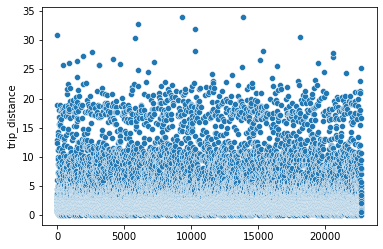

In [169]:
sns.scatterplot(x = data.index, y = data['trip_distance'])

<AxesSubplot:ylabel='fare_amount'>

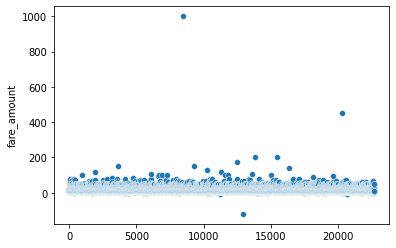

In [170]:
sns.scatterplot(x = data.index, y = data['fare_amount'])

<AxesSubplot:ylabel='tip_amount'>

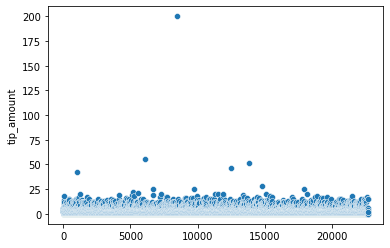

In [171]:
sns.scatterplot(x = data.index, y = data[ 'tip_amount'])

<AxesSubplot:ylabel='tolls_amount'>

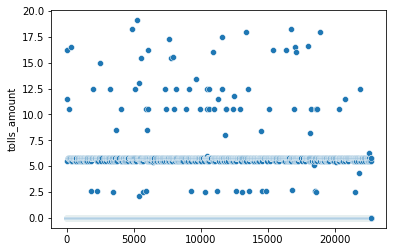

In [172]:
sns.scatterplot(x = data.index, y = data['tolls_amount'])

- 팁도 이상치가 있었는데, 처음에는 술취한 취객이 아무것도 모르고 200달러를 줬다고 생각을 해서 이상치라고 판단하지는 않았으나
팁 이상치와 요금의 이상치가 같은 행에 위치한다면 그것이 이상값이라고 생각하여 확인하는 코드를 작성

In [173]:
fare_max = data['fare_amount'].max()
fare_max_rows = data[data['fare_amount'] == fare_max]

In [174]:
tip_max = data['tip_amount'].max()
tip_max_rows = data[data['tip_amount'] == tip_max]

In [175]:
if fare_max_rows.index == tip_max_rows.index:
     print("Fare Amount와 Tip Amount의 최대값은 같은 행에 있습니다.")
else:
     print("Fare Amount와 Tip Amount의 최대값은 다른 행에 있습니다.")

Fare Amount와 Tip Amount의 최대값은 같은 행에 있습니다.


- 데이터프레임에서 특정 조건을 만족하는 행을 제거할 때, 해당 행은 데이터프레임의 모든 열에서 제거되기 때문에 요금 부분을 수정
요금에 음수도 존재하고 톨게이트비와 주행거리에 이상한 값이 딱히 없는것을 고려했을 때, 택시 총 요금이 이상값이 존재한다고 판단하여 IQR로 해당 부분을 처리

In [176]:
Q1 = data['fare_amount'].quantile(0.25)
Q3 = data['fare_amount'].quantile(0.75)
IQR = Q3 - Q1

In [177]:
data = data[(data['fare_amount'] >= (Q1 - 1.5 * IQR)) & (data['fare_amount'] <= (Q3 + 1.5 * IQR))]

### 택시 탑승 및 하차 시간

In [178]:
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])  

In [179]:
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

In [180]:
data['trip_duration'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds()

In [181]:
data.drop(columns=['passenger_name', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1, inplace=True)

- 택시 요금에 영향을 주지 않는 승객이름과 위에서 사용한 탑승 시간 하차 시간은 불필요한 컬럼이므로 삭제

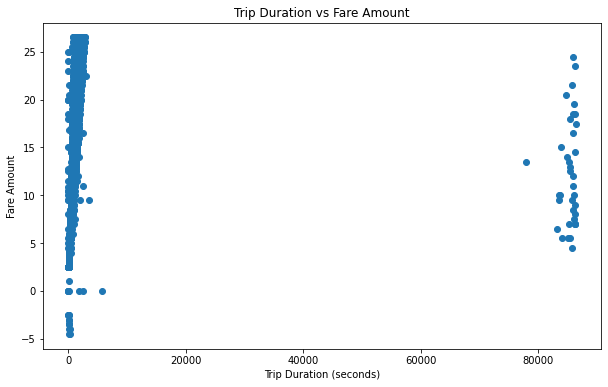

In [182]:
# 주행시간과 요금의 시각화
plt.figure(figsize=(10, 6))
plt.scatter(data['trip_duration'], data['fare_amount'])
plt.title('Trip Duration vs Fare Amount')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Fare Amount')
plt.show()



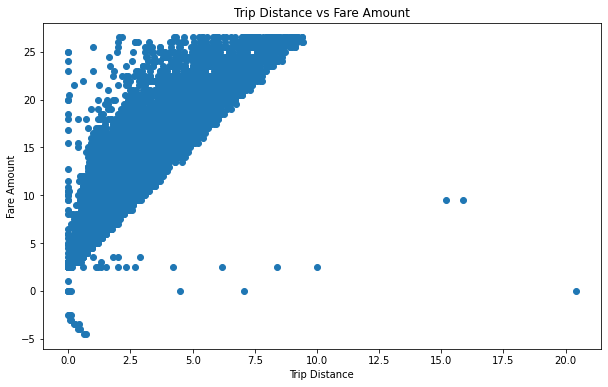

In [183]:
#주행 거리와 요금의 시각화
plt.figure(figsize=(10, 6))
plt.scatter(data['trip_distance'], data['fare_amount'])
plt.title('Trip Distance vs Fare Amount')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.show()

### Credit Card와 Debit Card를 구분없이 "Card"라는 이름으로 만들기

In [184]:
data['payment_method'] = data['payment_method'].replace({'Credit Card': 'Card', 'Debit Card': 'Card'})
data['payment_method'].value_counts()

Card    10461
Cash    10176
Name: payment_method, dtype: int64